## This notebook contains the results, graphs and the code for -
- Dataset : Predict Used Car Prices
- Algorithm: Random Forest Regression
- Data splitting technique: Hold Out

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import mean_squared_error
from IPython.display import display
import seaborn as sns 
sns.set()

## Feature Engineering

Shape before converting to one-hot vectors:  (20334, 9)
Shape after converting to one-hot vectors:  (20334, 386)


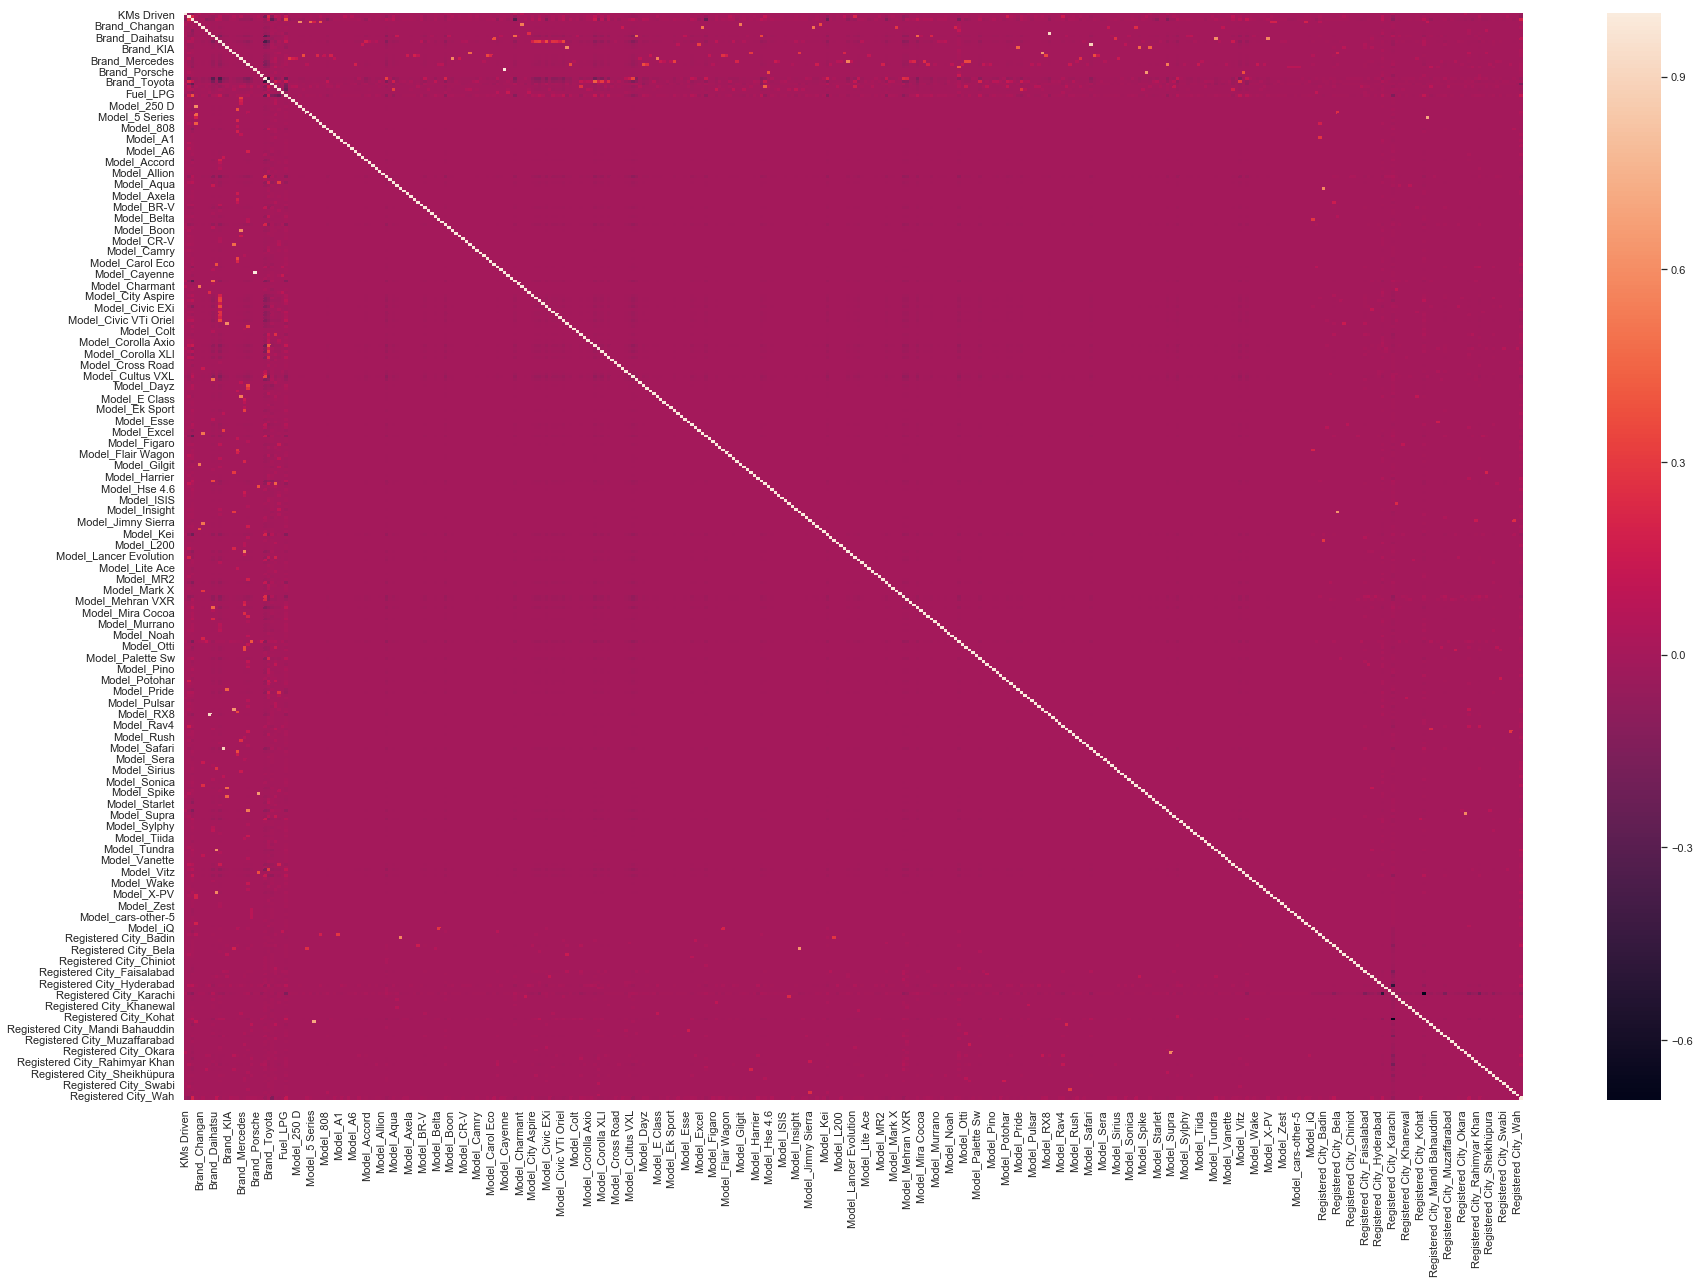

In [2]:
# Reading the dataset
dataset = pd.read_csv('OLX_Car_Data_CSV.csv', encoding = "ISO-8859-1")

# plot correlation matrix using heat map

# Removing the rows that contain NaN values
dataset = dataset.dropna()

# Converting the categorical data into one-hot vectors
print('Shape before converting to one-hot vectors: ', dataset.shape)
dataset = pd.get_dummies(dataset, drop_first=True)
print('Shape after converting to one-hot vectors: ', dataset.shape)

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(dataset.corr())

# According to the heat map, no two features in dataset are highly co-related, so I'll include all the features 
# I am dropping the feature Transaction Type since it may not affect used car price

## Handling missing values and labelling the data
 <span style="font-family:Arial; font-size: 1.2em;"> In the given dataset, there are many rows having all fields empty except 'Price' field, so I'm dropping such rows.<br />Then, remaining data contains very less missing cells, so I'm dropping those too. <br />Then, non-numeric values are converted to numbers using Label Encoder.<br />
</span>

In [3]:
# Reading the data using pandas 
df = pd.read_csv('OLX_Car_Data_CSV.csv', encoding = "ISO-8859-1")
display(df.head())

# Dropping the rows that have only 'Price' column and rest are empty
print("Shape before removing the rows that contain NaN in all features except 'Price' : ", df.shape)
df = df.dropna(subset=['Brand', 'Condition', 'Fuel', 'KMs Driven','Model','Registered City','Year','Transaction Type'],how='all')
print("Shape after removing the rows that contain NaN in all features except 'Price' : ", df.shape)

df = df.dropna()
# Encoding string as 0,1,2,... using Label Encoder
enc = LabelEncoder()
df['Brand'] = enc.fit_transform(df['Brand'])
df['Condition'] = enc.fit_transform(df['Condition'])
df['Fuel'] = enc.fit_transform(df['Fuel'])
df['Model'] = enc.fit_transform(df['Model'])
df['Registered City'] = enc.fit_transform(df['Registered City'])
df['Transaction Type'] = enc.fit_transform(df['Transaction Type'])

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


Shape before removing the rows that contain NaN in all features except 'Price' :  (24973, 9)
Shape after removing the rows that contain NaN in all features except 'Price' :  (22837, 9)


## Splitting the data
### Since, separate train and test data is not available, I'm splitting the data randomly: 70% as train data and 30% as test data

In [4]:
# Dividing the dataset
div = np.random.rand(len(df)) <= 0.7

train = df[div]
test = df[~div]

print('Training data samples')
display(train.head())
print('Testing data samples')
display(test.head())

# Writing divided data to .csv files
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
print('train.csv and test.csv is created')

Training data samples


,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,22,1,1,1.0,208,2100000,24,0,1997.0
2,21,1,0,12345.0,46,340000,24,0,1998.0
3,21,1,4,94000.0,29,535000,24,0,2010.0
4,22,1,4,100000.0,91,1430000,24,0,2013.0
5,22,1,4,80000.0,93,1620000,24,0,2012.0


Testing data samples


,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
1,21,1,4,100000.0,46,380000,24,0,2006.0
6,21,0,0,65000.0,99,450000,24,0,2006.0
9,8,1,4,1.0,78,480000,24,0,1997.0
10,21,1,0,123.0,156,230000,24,0,1994.0
11,21,1,0,73000.0,165,535000,24,0,2006.0


train.csv and test.csv is created


## Training the model and then predicting for test data

In [5]:
train_data = pd.read_csv('train.csv', encoding = "ISO-8859-1")
test_data = pd.read_csv('test.csv', encoding = "ISO-8859-1")

# Dropping the feature Transaction Type, since it may not affect used car price.
# Rest all features are important as observed using heatmap
train_data = train_data.drop(columns=['Transaction Type'])
test_data = test_data.drop(columns=['Transaction Type'])

# Selecting features and label for training
x_train_data = train_data.drop(columns='Price').values
price_train = train_data['Price'].values

# Selecting features and label for testing
x_test_data = test_data.drop(columns='Price').values
price_test = test_data['Price'].values

# Using Random forest regressor as training model
model = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)
model.fit(x_train_data, price_train)

# Prediction on test data
price_pred = model.predict(x_test_data)

# Writing predicted prices to submission.csv file
pd.DataFrame(price_pred).to_csv('submission.csv', header = ['Predicted Price'], index=False)
print('submission.csv is created having Predicted Prices')


# Calculating Mean Absolute Percentage Error
errors = abs(price_pred - price_test)
mape = 100 * (errors / price_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

submission.csv is created having Predicted Prices
Accuracy: 71.17 %
